08:09:02 - cmdstanpy - INFO - Chain [1] start processing
08:09:03 - cmdstanpy - INFO - Chain [1] done processing


Test Metrics:
MAE: 3943.5161
MSE: 26582004.7649
RMSE: 5155.7739
MAPE: 3.71%
WMAPE: 3.55%
Within 5%: 75.88%

Validation Metrics:
MAE: 25109.0948
MSE: 631108034.4298
RMSE: 25121.8637
MAPE: 19.73%
WMAPE: 19.73%
Within 5%: 0.00%


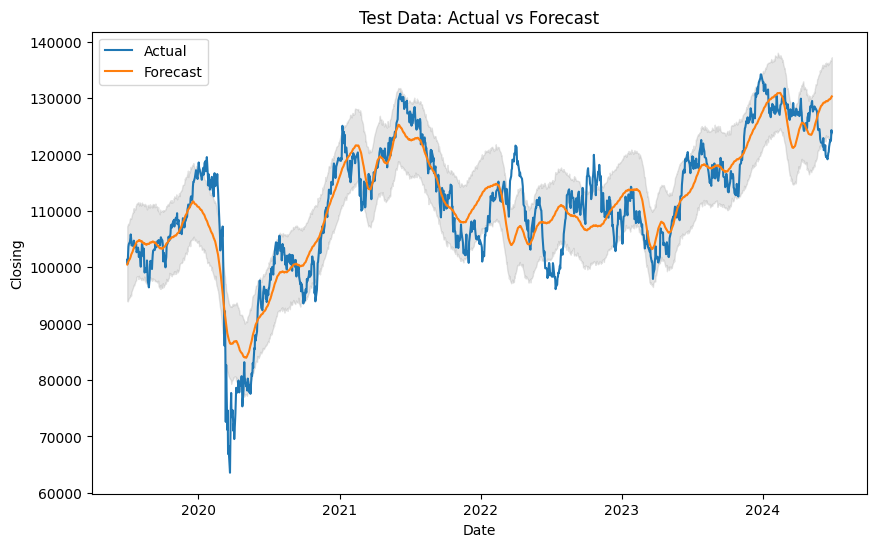

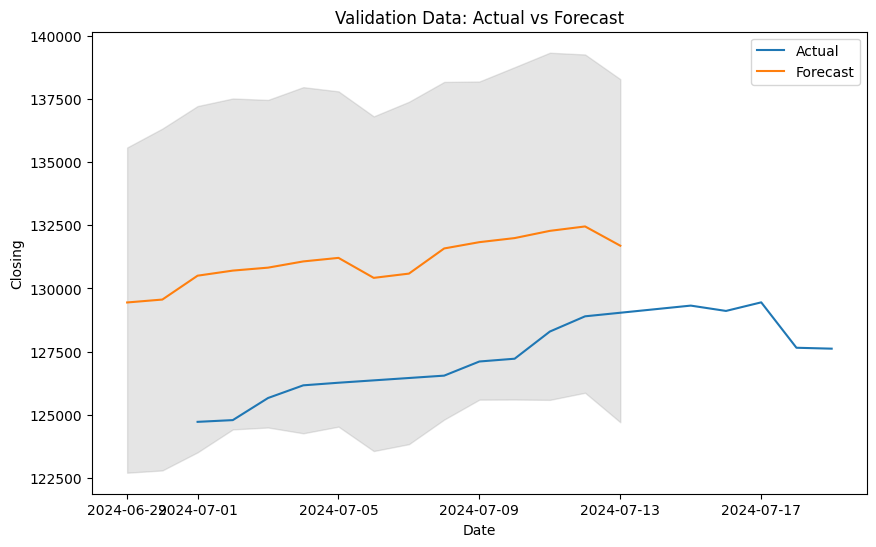

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('dados/dataset.csv')
validation_df = pd.read_csv('dados/validation.csv')

# Prepare data for Prophet
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['closing']
validation_df['ds'] = pd.to_datetime(validation_df['date'])
validation_df['y'] = validation_df['closing']

# Initialize and fit the model
model = Prophet()
model.fit(df[['ds', 'y']])

# Forecast
future = model.make_future_dataframe(periods=len(validation_df))
forecast = model.predict(future)

# Performance metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    wmape = np.sum(np.abs(actual - predicted)) / np.sum(actual) * 100
    within_5_percent = np.mean(np.abs((actual - predicted) / actual) <= 0.05) * 100
    return mae, mse, rmse, mape, wmape, within_5_percent

# Test data performance
test_actual = df['y']
test_predicted = forecast['yhat'][:len(df)]
test_metrics = calculate_metrics(test_actual, test_predicted)

# Validation data performance
val_actual = validation_df['y']
#val_predicted = forecast['yhat'][-len(validation_df):]
val_predicted = forecast['yhat'][:len(validation_df)]
val_metrics = calculate_metrics(val_actual, val_predicted)

# Print performance metrics
print(f"Test Metrics:\nMAE: {test_metrics[0]:.4f}\nMSE: {test_metrics[1]:.4f}\nRMSE: {test_metrics[2]:.4f}\nMAPE: {test_metrics[3]:.2f}%\nWMAPE: {test_metrics[4]:.2f}%\nWithin 5%: {test_metrics[5]:.2f}%")
print(f"\nValidation Metrics:\nMAE: {val_metrics[0]:.4f}\nMSE: {val_metrics[1]:.4f}\nRMSE: {val_metrics[2]:.4f}\nMAPE: {val_metrics[3]:.2f}%\nWMAPE: {val_metrics[4]:.2f}%\nWithin 5%: {val_metrics[5]:.2f}%")

# Plotting the results
def plot_forecast(df, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing')
    plt.legend()
    plt.show()

# Plot for test data
plot_forecast(df, forecast.iloc[:len(df)], 'Test Data: Actual vs Forecast')

# Plot for validation data
plot_forecast(validation_df, forecast.iloc[-len(validation_df):], 'Validation Data: Actual vs Forecast')
